# Prediction of Heart Disease via 3 ML models

We will apply 3 different ML models to predict whether patient has HEART DISEASE ( 1) or not (0).
1. KNearestNeighbors
2. RandomForestClassifier
3. DecisionTreeClassifier

In [100]:
#Importing Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'keras'

In [2]:
#Importing Dataset
data = pd.read_csv('dataset.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
for col in data.columns:
    print(col, ': ', len(data[col].unique()),'labels')

age :  41 labels
sex :  2 labels
cp :  4 labels
trestbps :  49 labels
chol :  152 labels
fbs :  2 labels
restecg :  3 labels
thalach :  91 labels
exang :  2 labels
oldpeak :  40 labels
slope :  3 labels
ca :  5 labels
thal :  4 labels
target :  2 labels


In [6]:
#Lets see correlation
corrmat = data.corr()
corrmat

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


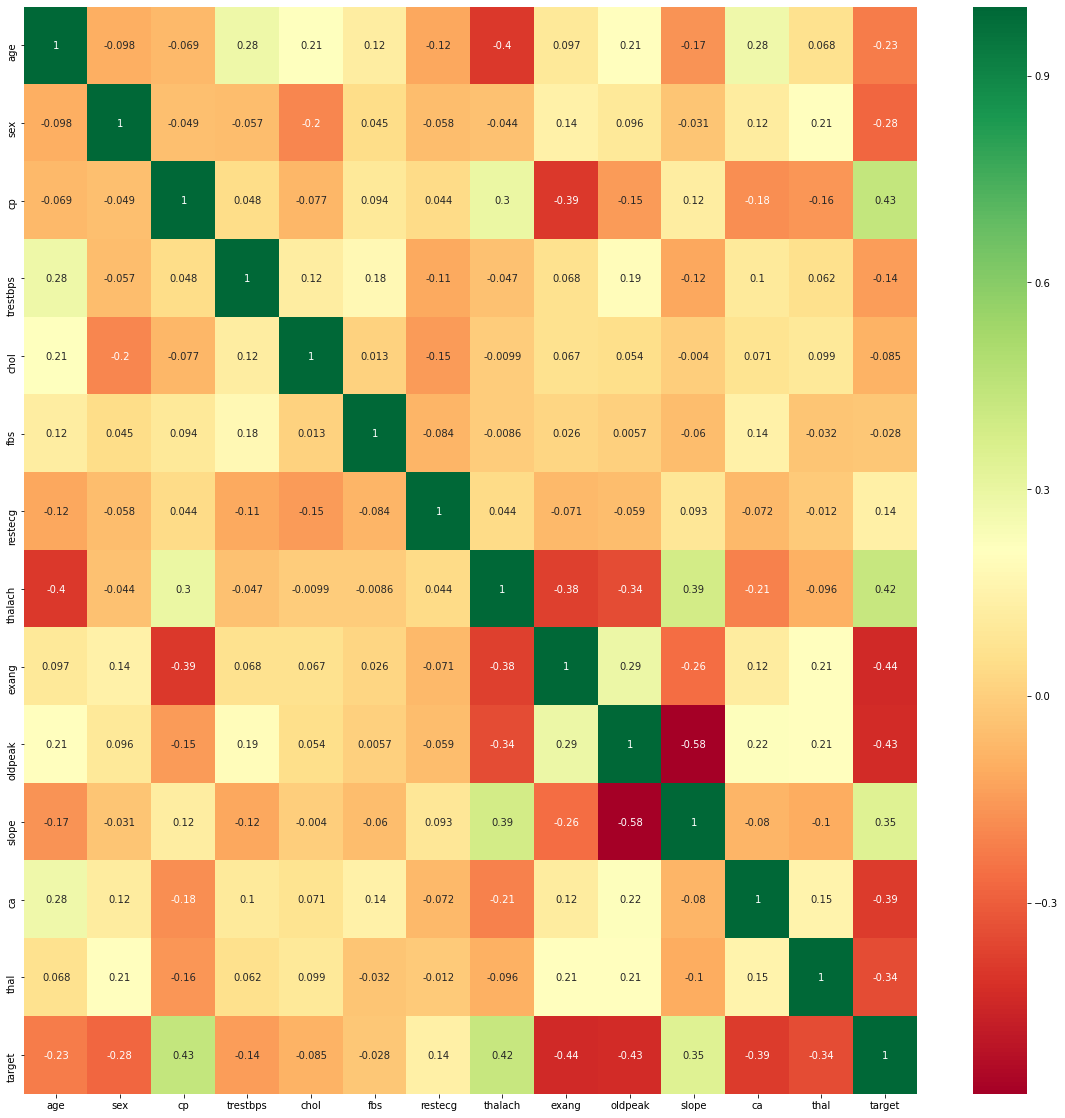

In [7]:
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

We can see Target ( dependent variable ) has positive relation with CP and thalach whereas negative relation with oldpeak,exang

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000009B147DEB48>,
      dtype=object)

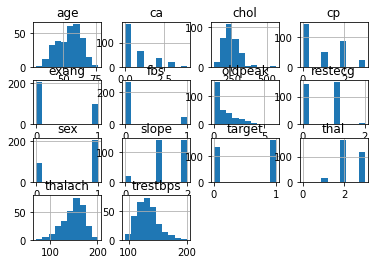

In [8]:
data.hist()

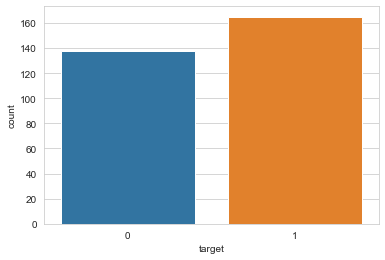

In [9]:
sns.set_style('whitegrid')
sns.countplot(data=data,x='target')

Since we can see the dataset is BALANCED and we can see which features are correlated, we can go to data pre processing steps.

## Data Pre-processing

In [10]:
data = pd.get_dummies(data,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])

In [11]:
data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
col_to_scale = ['age','trestbps','chol','thalach','oldpeak']
data[col_to_scale] = sc.fit_transform(data[col_to_scale])

In [13]:
data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [14]:
#Dataset
X = data.drop(['target'],axis=1)
y = data['target']

In [15]:
X

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [16]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

## Applying ML models 

## KNN Classifier

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K_values')

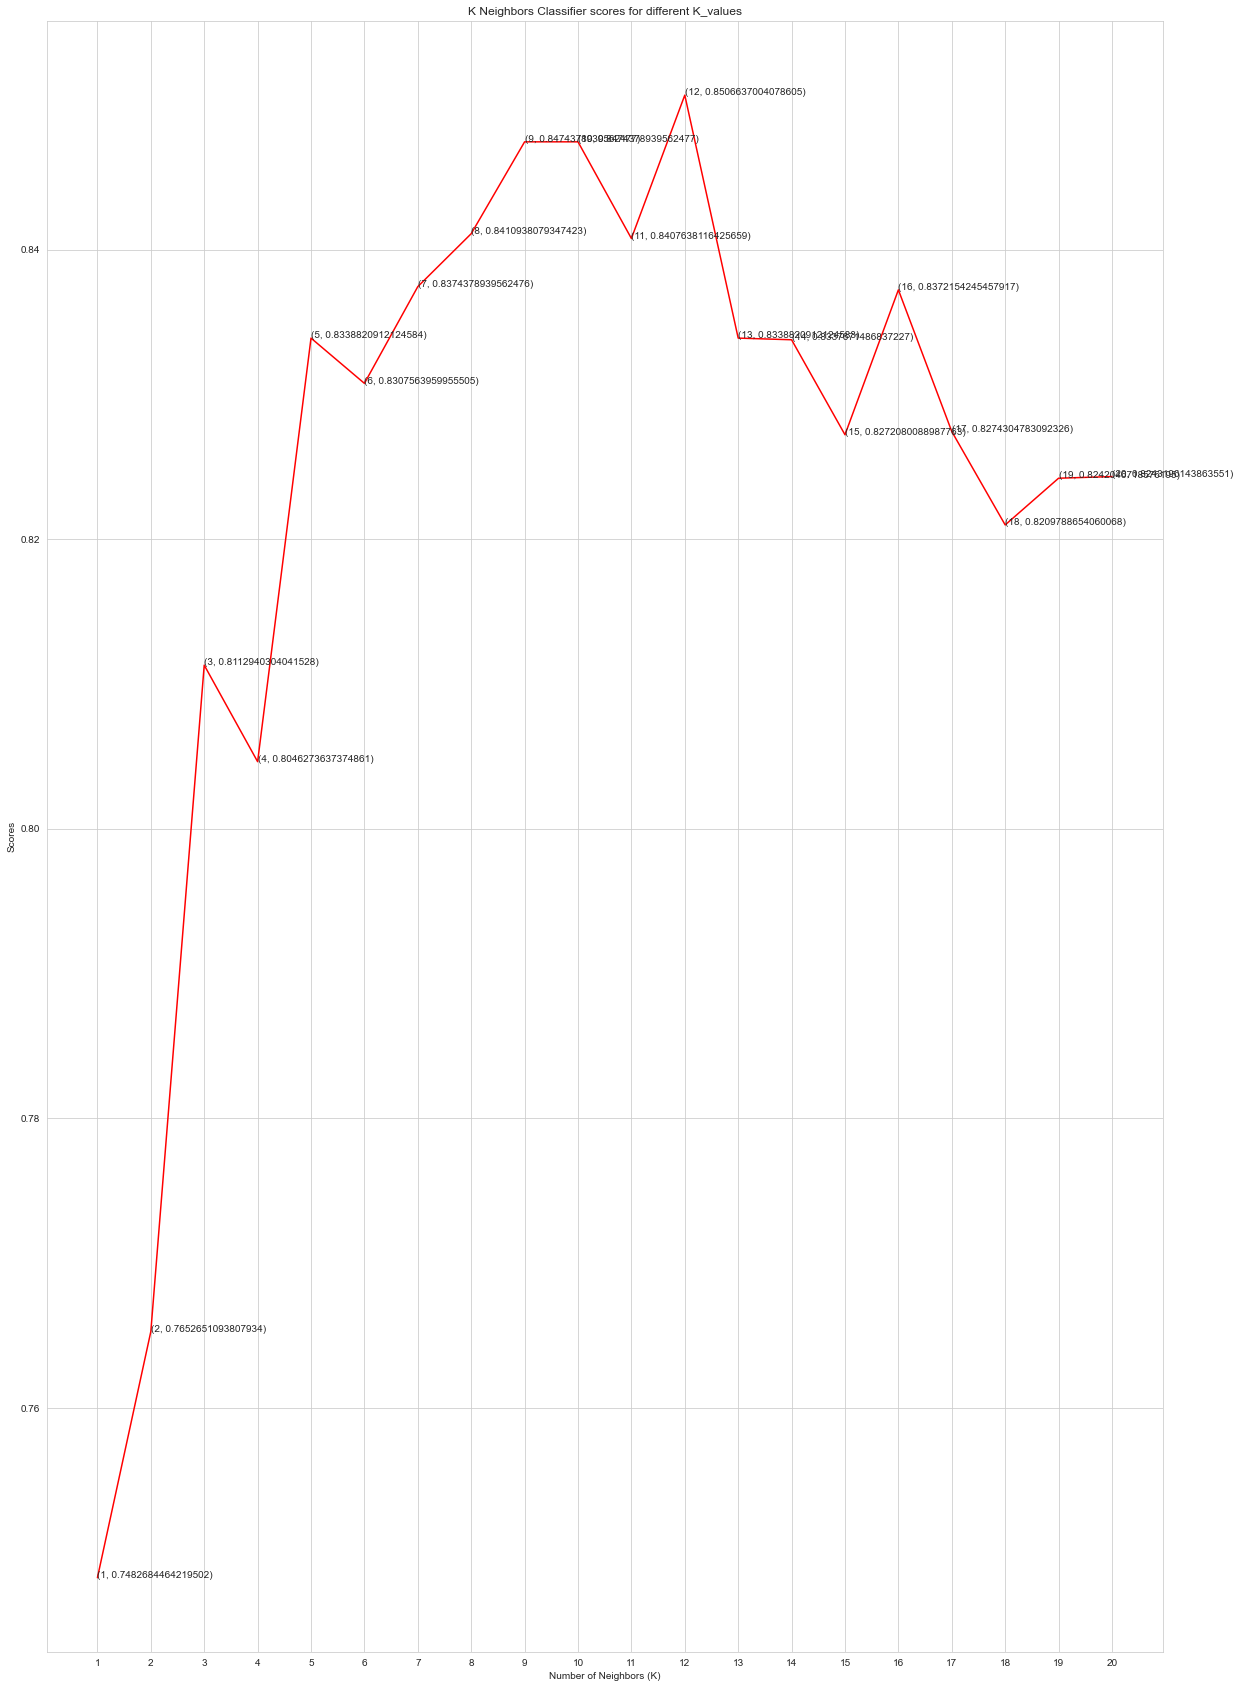

In [18]:
plt.figure(figsize=(20,30))
plt.plot([k for k in range(1,21)],knn_scores,color='red')
for i in range(1,21):
    plt.text(i,knn_scores[i-1],(i,knn_scores[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K_values')

In [79]:
#we can see 12 is the best K value with 85% accuracy
knn_classifier = KNeighborsClassifier(n_neighbors=12)
knn_score = cross_val_score(knn_classifier,X,y,cv=10)

In [80]:
KNN_Score = round(knn_score.mean()*100,2)
KNN_Score

85.07

## RandomForest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
randomClassifier= RandomForestClassifier(n_estimators=10)
randomForest_score = cross_val_score(randomClassifier,X,y,cv=10)

In [81]:
Random_Forest_Score=round(randomForest_score.mean()*100,2)
Random_Forest_Score

80.79

## DecisionTree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy')
Descion_tree_score = cross_val_score(dtree,X,y,cv=10)

In [82]:
Desicion_Tree_Score= round(Descion_tree_score.mean()*100,2)
Desicion_Tree_Score

75.17

## Logistic Regression 

In [64]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X,y)
lg_score = cross_val_score(lg,X,y,cv=10)

In [60]:
Logistic_Regression_Score = round(lg_score.mean()*100,2)
Logistic_Regression_Score

85.69

In [61]:
#Doing it without cross value
#from sklearn.linear_model import LogisticRegression
#lg_og = LogisticRegression()
#lg_og.fit(X,y)
#lg_og_score = round(lg_og.score(X,y).mean(),2)
#lg_og_score

In [65]:
coeff_df = pd.DataFrame(data.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(lg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
21,ca_0,1.383339
5,sex_0,0.703150
10,cp_3,0.684115
25,ca_4,0.676966
9,cp_2,0.599137
28,thal_2,0.596475
20,slope_2,0.494168
27,thal_1,0.413994
3,oldpeak,0.397190
16,exang_0,0.372565


,0
0,trestbps
1,chol
2,thalach
3,oldpeak
4,target
5,sex_0
6,sex_1
7,cp_0
8,cp_1
9,cp_2


## Support Vector Machine 

In [72]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X,y)
Support_Vector_Machine_Score = round(svc.score(X,y).mean()*100,2)
Support_Vector_Machine_Score

86.14

## Naive Bayes 

In [75]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X,y)
Naive_Bayes_Score = round(gnb.score(X,y).mean()*100,2)
Naive_Bayes_Score

84.82

## Perceptron 

In [77]:
from sklearn.linear_model import Perceptron
p = Perceptron()
p.fit(X,y)
Perceptron_Score = round(p.score(X,y).mean()*100,2)
Perceptron_Score

76.57

## Model Evaluation

In [83]:
model = pd.DataFrame( {
    'Model': ['K_Nearest_Neighbors_Classifer',
              'Logistic Regresion',
              'Decision TreeClassifier',
              'Support Vector Machine',
              'Random Forest Classifier',
             'Naive Bayes','Perceptron'],
    'Score': [KNN_Score,
              Logistic_Regression_Score,
              Desicion_Tree_Score,
              Support_Vector_Machine_Score,
              Random_Forest_Score,
              Naive_Bayes_Score,
              Perceptron_Score]
})

In [85]:
model

,Model,Score
0,K_Nearest_Neighbors_Classifer,85.07
1,Logistic Regresion,85.69
2,Decision TreeClassifier,75.17
3,Support Vector Machine,86.14
4,Random Forest Classifier,80.79
5,Naive Bayes,84.82
6,Perceptron,76.57


In [119]:
model_sorted = model.sort_values(by='Score',ascending=False)
model_sorted

,Model,Score
3,Support Vector Machine,86.14
1,Logistic Regresion,85.69
0,K_Nearest_Neighbors_Classifer,85.07
5,Naive Bayes,84.82
4,Random Forest Classifier,80.79
6,Perceptron,76.57
2,Decision TreeClassifier,75.17


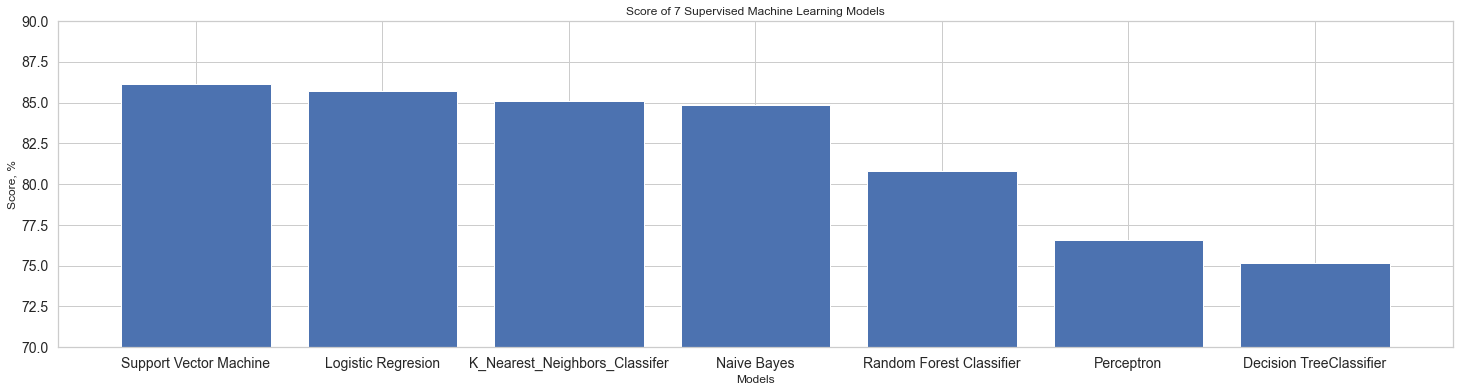

In [135]:
#Visualization
plt.figure(figsize=[25,6])
plt.tick_params(labelsize=14)
x = model_sorted['Model']
y = model_sorted['Score']
plt.bar(x,y)
plt.ylim(bottom=70,top=90)

plt.title('Score of 7 Supervised Machine Learning Models')
plt.xlabel('Models')
plt.ylabel('Score, %')
plt.show()